In [1]:
#@ LOADING THE REQUIRED DEPENDENCIES
import cv2
import pytesseract
from PIL import Image

In [2]:
#@ LOADING THE IMAGES
img_path = 'data/page_01.jpg'
noise_removed_photo = 'temp/no_noise.jpg'

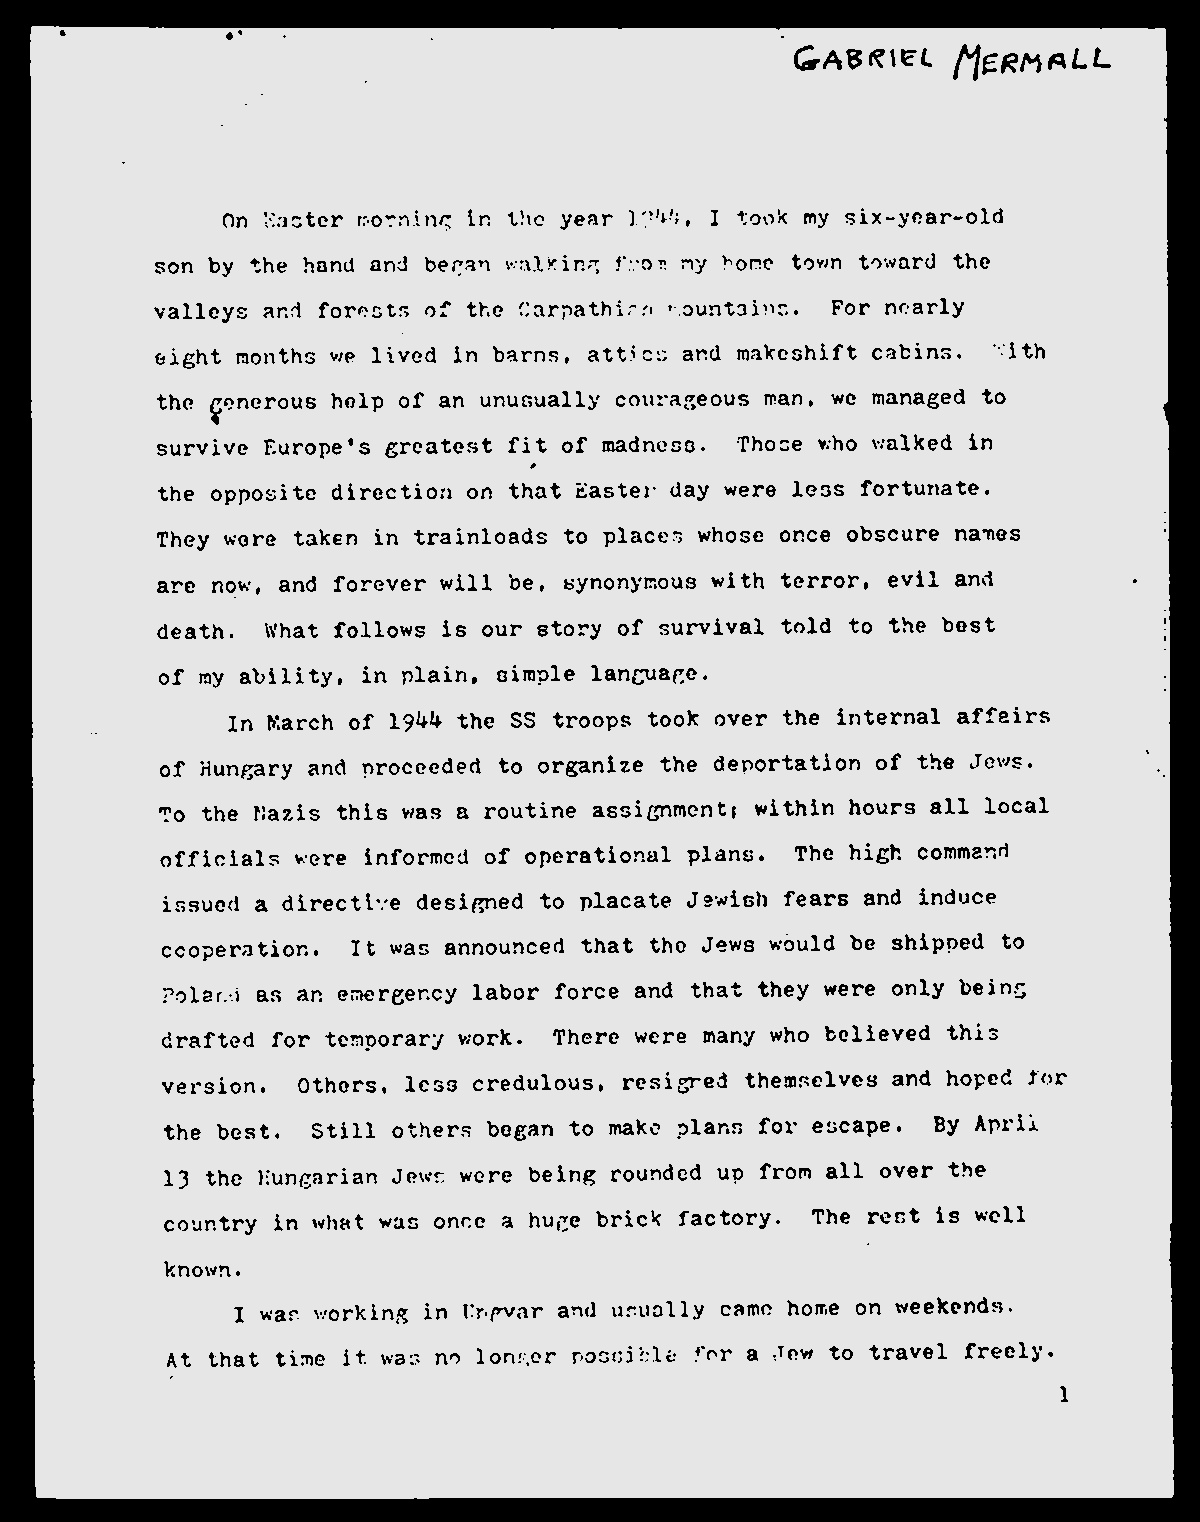

In [3]:
img = Image.open(noise_removed_photo)
display(img)

In [4]:
#@ LOADING THE IMAGES
image = cv2.imread("data/index_02.jpeg")
base_image = image.copy()

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("temp/index_gray.png", gray)

True

In [6]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
cv2.imwrite("temp/index_blur.png", blur)

True

In [7]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/index_thresh.png", thresh)

True

In [8]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
cv2.imwrite("temp/index_kernal.png", kernal)

True

In [9]:
dilate = cv2.dilate(thresh, kernal, iterations=1)
cv2.imwrite("temp/index_dilate.png", dilate)

True

In [10]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cents[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [11]:
results  = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = image[y:y+h, x:x+h]
        cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite("temp/index_bbox_new.png", image)

True

In [12]:
results

['A. v. E.',
 '',
 'Aaron 38, 20. 123, 18. 168, 6. 203, 38.',
 '',
 'Abacuc propheta 36,5. 319, 29. 373, 23.',
 '',
 'Abagarus rex Edessenorum 382, 13.',
 '',
 'Abdenago 585, 3.',
 '',
 'Abel 26, 11.',
 '',
 'Abigail 606, 6.',
 '',
 'Abraham 26,18. 124,18. 133, 23.',
 '',
 '264. 302, 13. 303, 13. 320, 40.',
 '',
 '496, 22.',
 '',
 'Absalon 102, 5.',
 '',
 'Acgfredi v. Ecgtridus.',
 '',
 'Achab rex 504, 1.',
 '',
 'Achaz rex 504,1.',
 '',
 'Achiel 606, 19.',
 '',
 'Achilon 496, 26.',
 '',
 'Adal-, Adel-, Adhel-, Aedel-, Aedel-,',
 '',
 'Aedil-, Aedil- Edel-, Edil-, Athal-,',
 '',
 'Athel-, Athil-, Aethel-, Aethil-,',
 '',
 'Ethel-.',
 '',
 'Aedelbaldusabb.S. Petri Wiremuthen-',
 '',
 'sis et S. Pauli Girwensis 110, 28.',
 '',
 'Aedilberctus, Aedilberthus ep. Ha-',
 '',
 'gulstadensis, antea ep. Candidae|',
 '',
 'casae sive Witernensis 27,43. 72,16.',
 '',
 'Adalbertus, Aedilberctus sive Magus,',
 '',
 'discipulus et capellanus Arnonis)',
 '',
 'archiep. Salisburg., postea_abb.',
 '',
 

In [13]:
entities = []
for item in results:
    item = item.strip().replace("\n", "")
    item = item.split(" ")[0]
    if len(item) > 2:
        if item[0] == "A" and "-" not in item:
            item = item.split(".")[0].replace(",", "").replace(";", "")
            entities.append(item)

entities

['Aaron',
 'Abacuc',
 'Abagarus',
 'Abdenago',
 'Abel',
 'Abigail',
 'Abraham',
 'Absalon',
 'Acgfredi',
 'Achab',
 'Achaz',
 'Achiel',
 'Achilon',
 'Aedelbaldusabb',
 'Aedilberctus',
 'Adalbertus',
 'Adalpertabb',
 'Adalbertus',
 'Aedilburga',
 'Aethelfleda',
 'Adalgarius',
 'Adelgisa',
 'Adalgisus',
 'Aethelhardus',
 'Aedelhardus',
 'Adelperga',
 'Aedelredus',
 'Aethilredus',
 'Aedilthyda',
 'Adhelricus',
 'Aedilthyda',
 'Aedelwaldus',
 'Aedilthyda',
 'Adalwinus',
 'Aethiluuinus',
 'Adam',
 'Adam',
 'Adaula',
 'Adoredus',
 'Adrianus',
 'Adriaticum',
 'Aegesippus',
 'Aegil',
 'Aegyptus',
 'Aegyptiacascola',
 'Aeine',
 'Aelberhtus',
 'Aelfvaldus',
 'Aelim',
 'Aeneades',
 'Aesculapius',
 'Aesne',
 'Aethiopia',
 'Africa',
 'Africanus',
 'Agar',
 'Agareni',
 'Agathensis',
 'Aginus',
 'Aethelhardus',
 'Aedelhardus',
 'Adalhardus',
 'Adalmondus',
 'Adelperga',
 'Adalpert',
 'Aedelredus',
 'Aethilredus',
 'Aedilthyda',
 'Adhelricus',
 'Aedilthyda',
 'Aedelwaldus',
 'Aedilthyda',
 'Adalwinus'

In [14]:
entities = list(set(entities))
entities

['Aegil',
 'Aegesippus',
 'Agar',
 'Aeneades',
 'Aethiopia',
 'Aelim',
 'Aelberhtus',
 'Aedelhardus',
 'Achab',
 'Aaron',
 'Agathensis',
 'Adalpertabb',
 'Adam',
 'Adalpert',
 'Abigail',
 'Aethiluuinus',
 'Aegyptus',
 'Abdenago',
 'Adelgisa',
 'Aedilberctus',
 'Abraham',
 'Adalbertus',
 'Africanus',
 'Adaula',
 'Abel',
 'Acgfredi',
 'Adalgarius',
 'Aethelhardus',
 'Aesculapius',
 'Achilon',
 'Adalgisus',
 'Aedilthyda',
 'Aedelredus',
 'Abacuc',
 'Absalon',
 'Aethelfleda',
 'Aeine',
 'Aedelwaldus',
 'Aelfvaldus',
 'Aegyptiacascola',
 'Agareni',
 'Aesne',
 'Aginus',
 'Adalmondus',
 'Adoredus',
 'Adhelricus',
 'Achaz',
 'Adelperga',
 'Aedelbaldusabb',
 'Adrianus',
 'Africa',
 'Abagarus',
 'Adalhardus',
 'Adalwinus',
 'Achiel',
 'Adriaticum',
 'Aedilburga',
 'Aethilredus']

In [15]:
entities.sort()
entities

['Aaron',
 'Abacuc',
 'Abagarus',
 'Abdenago',
 'Abel',
 'Abigail',
 'Abraham',
 'Absalon',
 'Acgfredi',
 'Achab',
 'Achaz',
 'Achiel',
 'Achilon',
 'Adalbertus',
 'Adalgarius',
 'Adalgisus',
 'Adalhardus',
 'Adalmondus',
 'Adalpert',
 'Adalpertabb',
 'Adalwinus',
 'Adam',
 'Adaula',
 'Adelgisa',
 'Adelperga',
 'Adhelricus',
 'Adoredus',
 'Adrianus',
 'Adriaticum',
 'Aedelbaldusabb',
 'Aedelhardus',
 'Aedelredus',
 'Aedelwaldus',
 'Aedilberctus',
 'Aedilburga',
 'Aedilthyda',
 'Aegesippus',
 'Aegil',
 'Aegyptiacascola',
 'Aegyptus',
 'Aeine',
 'Aelberhtus',
 'Aelfvaldus',
 'Aelim',
 'Aeneades',
 'Aesculapius',
 'Aesne',
 'Aethelfleda',
 'Aethelhardus',
 'Aethilredus',
 'Aethiluuinus',
 'Aethiopia',
 'Africa',
 'Africanus',
 'Agar',
 'Agareni',
 'Agathensis',
 'Aginus']